In [1]:
!pip install stop-words

In [2]:
import pandas as pd

import matplotlib.pyplot as plt
from wordcloud import WordCloud
from stop_words import get_stop_words
STOPWORDS_RU = get_stop_words('russian')

import warnings
warnings.filterwarnings("ignore")

In [3]:
# Подключение к google drive

from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [4]:
# датасет Банки.ру

df = pd.read_csv('/content/drive/MyDrive/bank_reviews_nlp/banki_ru_reviews.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 513560 entries, 0 to 513559
Data columns (total 18 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   url                      513560 non-null  object
 1   date_review              513560 non-null  object
 2   time_review              513560 non-null  object
 3   user_name                513560 non-null  object
 4   user_city                513560 non-null  object
 5   review_title             513560 non-null  object
 6   review_text              513560 non-null  object
 7   review_status            513560 non-null  object
 8   rating                   513560 non-null  object
 9   clear_conditions_rating  513560 non-null  int64 
 10  polite_staff_rating      513560 non-null  int64 
 11  support_rating           513560 non-null  int64 
 12  app_site_rating          513560 non-null  int64 
 13  bank_name                513560 non-null  object
 14  is_bank_ans         

In [5]:
df.isna().sum()

url                         0
date_review                 0
time_review                 0
user_name                   0
user_city                   0
review_title                0
review_text                 0
review_status               0
rating                      0
clear_conditions_rating     0
polite_staff_rating         0
support_rating              0
app_site_rating             0
bank_name                   0
is_bank_ans                 0
time_bank_ans              31
date_bank_ans              31
bank_text_ans               1
dtype: int64

Видно, что в датасете практически нет пропусков. Изучим его внимательнее.

In [6]:
df.head(5)

,url,date_review,time_review,user_name,user_city,review_title,review_text,review_status,rating,clear_conditions_rating,polite_staff_rating,support_rating,app_site_rating,bank_name,is_bank_ans,time_bank_ans,date_bank_ans,bank_text_ans
0,https://www.banki.ru/services/responses/bank/r...,01.01.2024,18:12,Tta3072709339,Ялта (Республика Крым),Воспользовался услугой перевод баланса,воспользовался услугой перевод баланса на част...,Отзыв проверен,Оценка\n3,0,0,0,0,Тинькофф Банк,yes,16:28:25,2024-01-02,Здравствуйте. \r\n\r\nСовместно с переводом ба...
1,https://www.banki.ru/services/responses/bank/r...,01.01.2024,18:08,user-459616501786,Новокузнецк,Помощь в установление приложения,"Здравствуйте, хотел бы поделится своим опытом ...",Отзыв проверен,Оценка\n5,3,3,3,3,Альфа-Банк,yes,23:58:41,2024-01-12,"Приветствуем!\n\nСпасибо, нам очень приятно ❤️..."
2,https://www.banki.ru/services/responses/bank/r...,01.01.2024,18:06,user-722015406862,Кинешма (Ивановская область),Подозрение на мошенников,Пользуюсь картой Халва уже четыре года.Доволен...,Отзыв проверен,Оценка\n4,3,3,3,3,Совкомбанк,yes,16:46:24,2024-01-05,Добрый день!\r\nСпасибо за высокую оценку! Для...
3,https://www.banki.ru/services/responses/bank/r...,01.01.2024,18:05,user-609716541182,Санкт-Петербург,Помощь с оплатой налогов,Нужно было оплатить обязательные налоги за 202...,Отзыв проверен,Оценка\n5,3,3,3,3,Тинькофф Банк,yes,11:45:27,2024-01-16,"Добрый день.\n\nМы рады, что смогли помочь вам..."
4,https://www.banki.ru/services/responses/bank/r...,01.01.2024,18:13,user-748016389234,Курган,Отличная карта с отличными условиями,"Карта полностью понравилось ,дали платежные ст...",Отзыв проверен,Оценка\n5,3,3,3,3,Альфа-Банк,yes,00:02:25,2024-01-13,"Приветствуем!\n\nСпасибо, нам очень приятно ❤️..."


In [7]:
df.sample(5)

,url,date_review,time_review,user_name,user_city,review_title,review_text,review_status,rating,clear_conditions_rating,polite_staff_rating,support_rating,app_site_rating,bank_name,is_bank_ans,time_bank_ans,date_bank_ans,bank_text_ans
66693,https://www.banki.ru/services/responses/bank/r...,30.11.2023,18:57,user-970916153725,Чебоксары,Об альфа-банке,"Классное и современное мобильное приложение, л...",Отзыв проверен,Оценка\n5,3,3,3,3,Альфа-Банк,yes,22:15:49,2023-12-02,"Приветствуем!\n\nСпасибо, нам очень приятно ❤️..."
172296,https://www.banki.ru/services/responses/bank/r...,09.10.2023,23:43,Palkinm,Красногорск (Москва и область),Платная страховка,Начну повествование с начала знакомства с банк...,Отзыв проверен,Оценка\n2,1,2,1,1,Газпромбанк,yes,14:38:19,2023-10-10,Здравствуйте!\r\n\r\nВзяли ваш вопрос в работу...
348763,https://www.banki.ru/services/responses/bank/r...,26.05.2023,14:46,user-980710403697,Ангарск,Отличный банк!,"Банк всегда приходит на помощь, когда другие т...",Отзыв проверен,Оценка\n5,3,3,3,3,Совкомбанк,yes,14:24:50,2023-05-30,Добрый день!\nСпасибо за отзыв! Нам важно полу...
201110,https://www.banki.ru/services/responses/bank/r...,20.09.2023,16:03,user-556014667146,Губаха (Пермский край),О поддержке Тинькофф,Тинькофф – это не только основной банк для мен...,Отзыв проверен,Оценка\n5,3,3,3,3,Тинькофф Банк,yes,11:38:59,2023-10-16,"Здравствуйте.\n\nРады, что вам нравится наш ба..."
180423,https://www.banki.ru/services/responses/bank/r...,30.09.2023,15:12,A.I.Kotov,Москва,Начисление кэшбека,В сентябре у меня по карте Тинькофф Black был ...,Отзыв проверен,Оценка\n5,3,3,3,3,Тинькофф Банк,yes,15:47:54,2023-09-30,Здравствуйте.\n\nАндрей - большой молодец. Обя...


Изучим данные и приведем столбцы к нужному формату.

Нас интересуют данные за весь 2023 год и первый квартал 2024.

In [8]:
df.date_review = pd.to_datetime(df.date_review, format='%d.%m.%Y')
df = df[(df['date_review'] >= '2023-01-01') & (df['date_review'] <= '2024-03-31')]
df.shape[0]

512667

In [9]:
# Статус отзыва

df.review_status.value_counts()

review_status
Отзыв проверен                                   467993
unk                                               29704
Отзыв проверен\n\t\t\n\n\t\t\tПроблема решена     14963
Отзыв проверяется                                     7
Name: count, dtype: int64

In [10]:
df['review_status'] = df['review_status'].replace({'Отзыв проверен\n\t\t\n\n\t\t\tПроблема решена': 'Проблема решена'})

В основном, отзывы проверены. Для менее 5% отзывов проблема была решена.
У отзывов со статусом 'unk' нет оценки, что означает, что этот отзыв не участвует в рейтинге банка.

In [11]:
# Рейтинг

df.rating.value_counts()

rating
Оценка\n5     394432
Оценка\n1      60658
Без оценки     29704
Оценка\n4      14995
Оценка\n2       8665
Оценка\n3       4213
Name: count, dtype: int64

Оставим в этом столбце либо оценку (от 1 до 5), либо "Без оценки"

In [12]:
df.rating = df.rating.apply(lambda x: x[-1] if x != 'Без оценки' else x)

df.rating.value_counts()

rating
5             394432
1              60658
Без оценки     29704
4              14995
2               8665
3               4213
Name: count, dtype: int64

In [13]:
# Количество отзывов по банкам (топ-10)

df.bank_name.value_counts().head(10)

bank_name
Альфа-Банк                         249134
Тинькофф Банк                       58707
Совкомбанк                          46253
Сбербанк                            21510
ВТБ                                 13955
Россельхозбанк                      13899
Т-Банк                              11962
Русский Стандарт                    10062
Газпромбанк                          9364
Московский кредитный банк (МКБ)      8766
Name: count, dtype: int64

Построим круговую диаграмму по кол-ву отзывов для топ-10 банков. Остальные объединим в категорию прочее.

In [14]:
top_10 = df.bank_name.value_counts().index[:10].tolist()

def assign_bank_names(row):
    if row['bank_name'] in top_10:
        return row['bank_name']
    else:
        return 'Прочее'

df['bank_name_new'] = df.apply(assign_bank_names, axis=1)
name_counts = df['bank_name_new'].value_counts()

In [15]:
# Проделаем тоже самое для отзывов, которые прошли модерацию и участвуют в рассчете рейтинга для банка

df_checking = df[(df.review_status != 'unk') & (df.review_status != 'Отзыв проверяется')]

top_10 = df_checking.bank_name.value_counts().index[:10].tolist()

df_checking['bank_name_new_checking'] = df_checking.apply(assign_bank_names, axis=1)
name_counts_checking = df_checking['bank_name_new_checking'].value_counts()

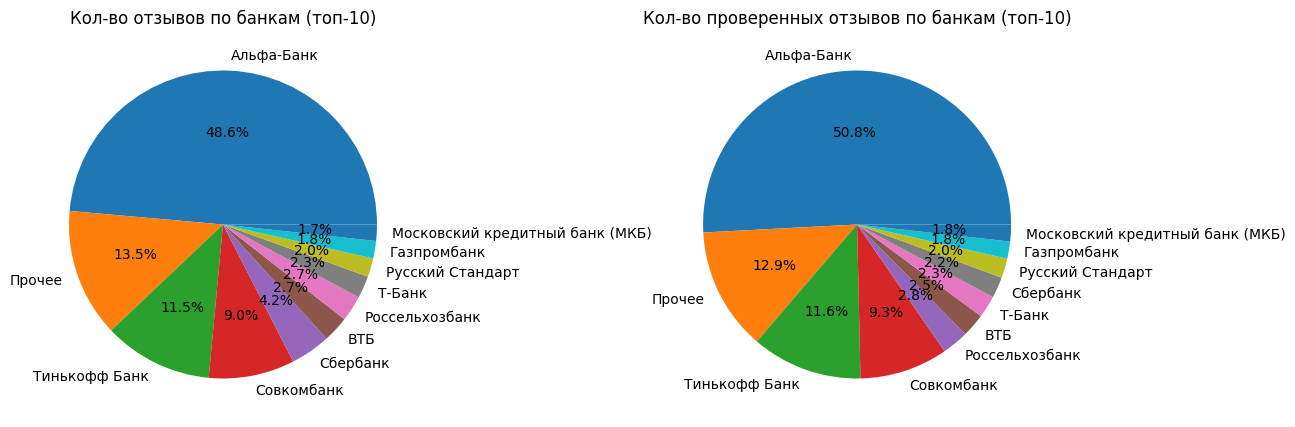

In [16]:
# Строим графики

plt.subplots(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.title("Кол-во отзывов по банкам (топ-10)")
plt.pie(name_counts, labels=name_counts.index, autopct='%1.1f%%')

plt.subplot(1, 2, 2)
plt.title("Кол-во проверенных отзывов по банкам (топ-10)")
plt.pie(name_counts_checking, labels=name_counts_checking.index, autopct='%1.1f%%');

Построим облако слов для колонки "Текст обращения". В облако будем включать слова от 3 букв и выше.

In [17]:
df.review_text[0]

'воспользовался услугой перевод баланса на часть своего лимита, а именно на 120.000\r\nиз 220.000.\r\nперед новым годом решил закрыть часть которая не является перевод баланса .\r\n26 декабря уточнил в поддержке.\r\nсказали не переживайте остатком лимита пользуетесь как обычно.\r\nсо спокойной душой закрываю 100.000\r\nи 31 декабря узнаю что эта сумма пошла на перевод баланса .'

In [18]:
df['review_text'] = df['review_text'].astype(str)
df['review_text'] = df['review_text'].apply(lambda x: x.replace('\r', '').replace('\n', ''))

text = " ".join(df['review_text'])
text[:1000]

'воспользовался услугой перевод баланса на часть своего лимита, а именно на 120.000из 220.000.перед новым годом решил закрыть часть которая не является перевод баланса .26 декабря уточнил в поддержке.сказали не переживайте остатком лимита пользуетесь как обычно.со спокойной душой закрываю 100.000и 31 декабря узнаю что эта сумма пошла на перевод баланса . Здравствуйте, хотел бы поделится своим опытом с банком, заказывал карты пришли в срок, приехал курьер в точное время, думал что курьер задержится,после приезда курьера, я не мог установить мобильное приложение, курьер карты, помог установить мобильное приложение и рассказал об услугах карт, я всем доволен в обслуживании, спасибо за пролукт Пользуюсь картой Халва уже четыре года.Доволен картой и обслуживанием.Удобное мобильное приложение в котором недавно всплыло окно в котором говорилось ,что необходимо загрузить обновления,пройдя по ней вскрывались другие окна.Мне это показалось подозрительным и я связался в чате с сотрудником банка.П

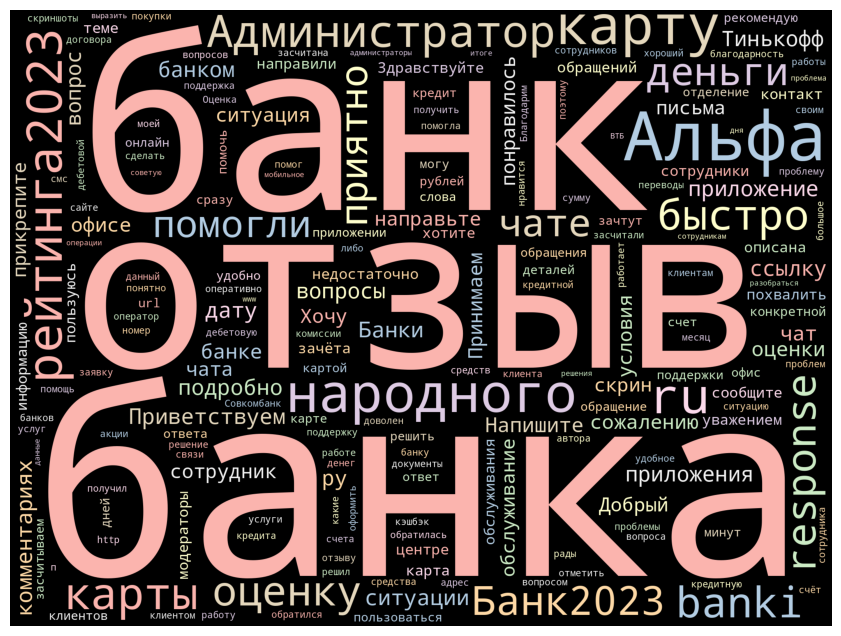

In [19]:
wordcloud = WordCloud(width = 2000,
                      height = 1500,
                      random_state=42,
                      background_color='black',
                      margin=20,
                      colormap='Pastel1',
                      collocations=False,
                      stopwords = STOPWORDS_RU).generate(text)

plt.figure(figsize=(11, 8))
plt.imshow(wordcloud)
plt.axis("off");

Перейдем к датасету с сайта Сравни.ру

In [20]:
df_2 = pd.read_csv('/content/drive/MyDrive/bank_reviews_nlp/sravni_ru_reviews.csv')
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95672 entries, 0 to 95671
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   url             95672 non-null  object
 1   review_date     95672 non-null  object
 2   user_name       95672 non-null  object
 3   user_city       95672 non-null  object
 4   user_city_full  95672 non-null  object
 5   review_title    95672 non-null  object
 6   review_text     95672 non-null  object
 7   review_status   95672 non-null  object
 8   problem_status  95672 non-null  bool  
 9   rating          95672 non-null  int64 
 10  review_tag      95672 non-null  object
 11  bank_name       95672 non-null  object
 12  is_bank_ans     95672 non-null  bool  
dtypes: bool(2), int64(1), object(10)
memory usage: 8.2+ MB


In [21]:
df_2.isna().sum()

url               0
review_date       0
user_name         0
user_city         0
user_city_full    0
review_title      0
review_text       0
review_status     0
problem_status    0
rating            0
review_tag        0
bank_name         0
is_bank_ans       0
dtype: int64

In [22]:
def convert_datetime(date_time_str):
    try:
        return pd.to_datetime(date_time_str, format='%Y-%m-%dT%H:%M:%S.%fZ')
    except ValueError:
        return pd.to_datetime(date_time_str, format='%Y-%m-%dT%H:%M:%SZ')

# Применение функции к каждому элементу столбца
df_2['review_date'] = df_2['review_date'].apply(convert_datetime)

df_2['date_review'] = pd.to_datetime(df_2['review_date'].dt.date)
df_2['time_review'] = df_2['review_date'].dt.time

df_2 = df_2[(df_2['date_review'] >= '2023-01-01') & (df_2['date_review'] <= '2024-03-31')]
df_2.shape[0]

95665

In [23]:
# Решена ли проблема

df_2.problem_status.value_counts()

problem_status
False    92711
True      2954
Name: count, dtype: int64

In [24]:
# Статус отзыва

df_2.review_status.value_counts()

review_status
rateApproved    58907
rateRejected    36208
rateChecking      550
Name: count, dtype: int64

In [25]:
# Оценка

df_2.rating.value_counts()

rating
5    55342
0    36208
4     1935
1     1806
3      193
2      181
Name: count, dtype: int64

In [26]:
# Количество отзывов по банкам

df_2.bank_name.value_counts().head(10)

bank_name
Альфа-Банк        61599
Совкомбанк        16115
Т-Банк             5725
Банк Точка         1611
Сбербанк           1249
Центр-инвест        871
ВТБ                 767
Газпромбанк         703
МТС Банк            697
Россельхозбанк      689
Name: count, dtype: int64

Построим круговую диаграмму по кол-ву отзывов для топ-10 банков. Остальные объединим в категорию прочее.

In [27]:
top_10 = df_2.bank_name.value_counts().index[:10].tolist()

df_2['bank_name_new'] = df_2.apply(assign_bank_names, axis=1)
name_counts = df_2['bank_name_new'].value_counts()

In [28]:
# Проделаем тоже самое для отзывов, которые прошли модерацию и участвуют в рассчете рейтинга для банка

df_2_checking = df_2[df_2.review_status == 'rateApproved']

top_10 = df_2_checking.bank_name.value_counts().index[:10].tolist()

df_2_checking['bank_name_new_checking'] = df_2_checking.apply(assign_bank_names, axis=1)
name_counts_checking = df_2_checking['bank_name_new_checking'].value_counts()

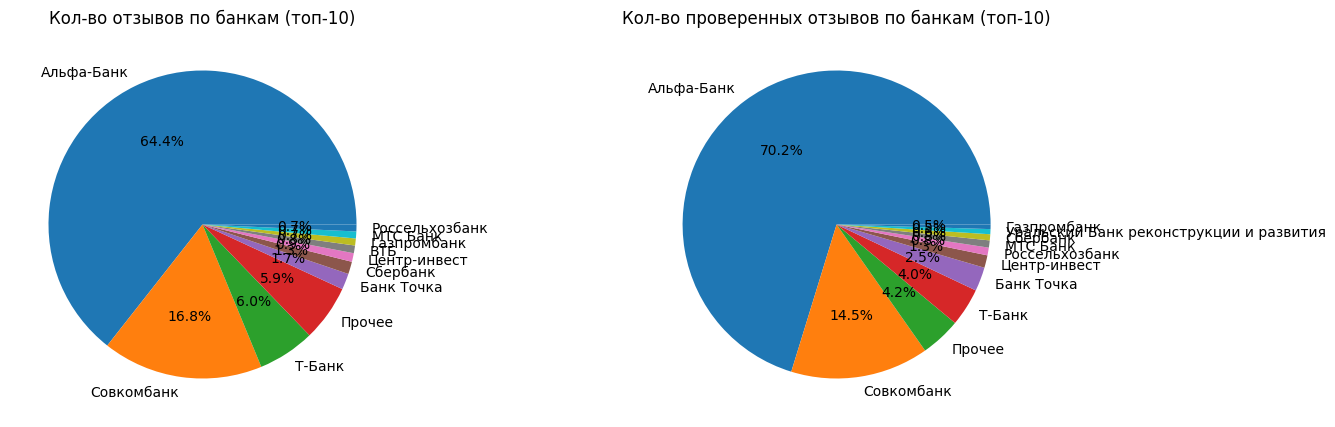

In [29]:
plt.subplots(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.title("Кол-во отзывов по банкам (топ-10)")
plt.pie(name_counts, labels=name_counts.index, autopct='%1.1f%%')

plt.subplot(1, 2, 2)
plt.title("Кол-во проверенных отзывов по банкам (топ-10)")
plt.pie(name_counts_checking, labels=name_counts_checking.index, autopct='%1.1f%%');

In [30]:
df_2['review_text'] = df_2['review_text'].astype(str)
df_2['review_text'] = df_2['review_text'].apply(lambda x: x.replace('\r', '').replace('\n', '').replace('\xa0', ' '))

text_2 = " ".join(df_2['review_text'])
text_2[:1000]

'1 марта я посетил обменный пункт в центре города для обмена валюты. Мне было необходимо обменять доллары на евро, так как планировал поездку в Европу.При входе в обменный пункт меня встретил приветливый сотрудник, который предложил мне выбрать удобное для меня время и место для проведения операции обмена. Я выбрал столик возле окна, чтобы иметь возможность наблюдать за улицей во время обмена валюты.Сотрудник предложил мне выгодный курс обмена и объяснил все условия операции. Я был приятно удивлен тем, что обмен прошел быстро и без лишних формальностей. Весь процесс занял всего несколько минут, и я получил нужную мне сумму евро.Обменный пункт был чистым и уютным, а обслуживание на высоком уровне. Я остался доволен своим визитом и обменом валюты. Рекомендую этот обменный пункт всем, кто ищет надежное и выгодное место для обмена валюты. Отношение к клиентам внимательное. В любое время когда приходишь в отделении тут нету очередей и столпотворения. Сотрудники стараются по максимуму помочь

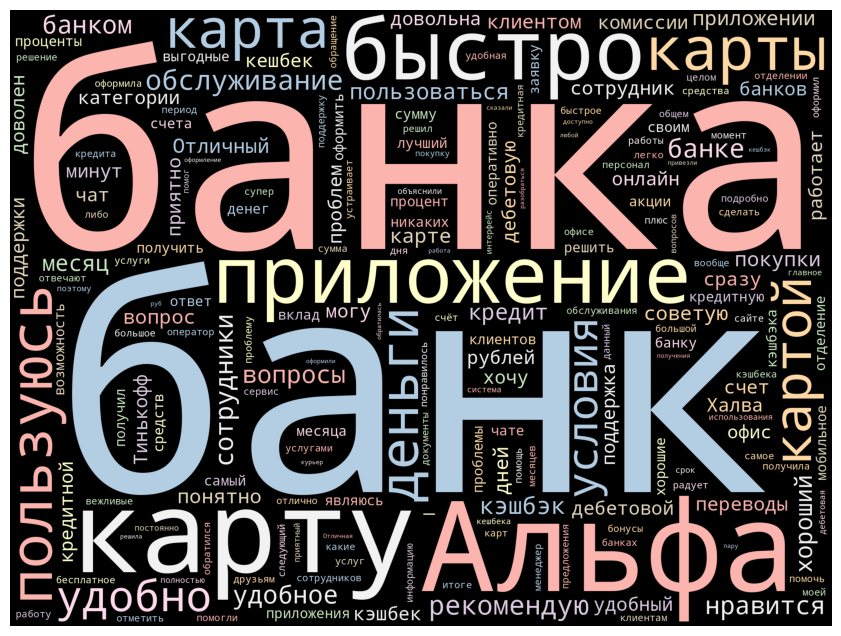

In [31]:
wordcloud = WordCloud(width = 2000,
                      height = 1500,
                      random_state=21,
                      background_color='black',
                      margin=20,
                      colormap='Pastel1',
                      collocations=False,
                      stopwords = STOPWORDS_RU).generate(text_2)

plt.figure(figsize=(11, 8))
plt.imshow(wordcloud)
plt.axis("off");

Объединим датасеты, приведем назания банков к единому наименованию и посмотрим статистику на итоговом датасете.

In [32]:
banki_ru_replace = {'Ozon Банк':'ОЗОН Банк', 'Агророс Банк':'Агророс', 'Азиатско-Тихоокеанский банк (АТБ)':'Азиатско-Тихоокеанский Банк', 'Банк «Венец»':'Венец',
                   'Банк «Левобережный»':'Левобережный', 'Банк «Мир Привилегий»':'Мир привилегий', 'Банк «Открытие»':'Открытие', 'Банк «Пойдём!»':'Пойдём!',
                   'Банк «Приморье»':'Приморье', 'Банк «РЕСО Кредит»':'РЕСО Кредит', 'Банк «РОССИЯ»':'РОССИЯ', 'Банк «Солидарность»':'Солидарность',
                   'Гарант-Инвест':'Гарант-инвест', 'КАМКОМБАНК':'Камкомбанк', 'МОСОБЛБАНК':'Мособлбанк', 'Московский кредитный банк (МКБ)':'Московский Кредитный Банк',
                   'НОВИКОМ':'Новиком', 'Просто|Банк':'Просто Банк', 'РУСНАРБАНК':'Руснарбанк', 'Таврический Банк':'Таврический', 'Тинькофф Банк':'Т-Банк',
                   'Уральский банк реконструкции и развития (УБРиР)':'Уральский Банк реконструкции и развития'}
sravni_ru_replace = {'Банк БЖФ':'БЖФ Банк', 'ФК Открытие':'Открытие', 'Банк ВБРР':'ВБРР', 'КБ Солидарность':'Солидарность', 'ДелоБанк':'Делобанк',
                     'Кредит Европа Банк (Россия)':'Кредит Европа Банк', 'Банк Юнистрим':'Юнистрим', 'Райффайзенбанк':'Райффайзен Банк', 'Ростфинанс':'РостФинанс',
                     'Росбанк Дом':'Росбанк', 'РОСБАНК':'Росбанк', 'Банк Точка':'Точка', 'Банк Уралсиб':'Уралсиб', 'Банк Хлынов':'Хлынов'}


for old_value, new_value in banki_ru_replace.items():
    df_checking['bank_name'] = df_checking['bank_name'].replace(old_value, new_value)

for old_value, new_value in sravni_ru_replace.items():
    df_2_checking['bank_name'] = df_2_checking['bank_name'].replace(old_value, new_value)

In [33]:
df_total = pd.concat([df_checking[['url', 'bank_name']], df_2_checking[['url', 'bank_name']]])
df_total.info()

<class 'pandas.core.frame.DataFrame'>
Index: 541863 entries, 0 to 95663
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   url        541863 non-null  object
 1   bank_name  541863 non-null  object
dtypes: object(2)
memory usage: 12.4+ MB


In [34]:
df_total.bank_name.value_counts().head(10)

bank_name
Альфа-Банк                   286857
Т-Банк                        69819
Совкомбанк                    53279
Россельхозбанк                13892
ВТБ                           12065
Сбербанк                      10980
Русский Стандарт               9873
Газпромбанк                    8954
Московский Кредитный Банк      8557
МТС Банк                       8258
Name: count, dtype: int64

In [35]:
top_10 = df_total.bank_name.value_counts().index[:10].tolist()

df_total['bank_name_new'] = df_total.apply(assign_bank_names, axis=1)
name_counts = df_total['bank_name_new'].value_counts()

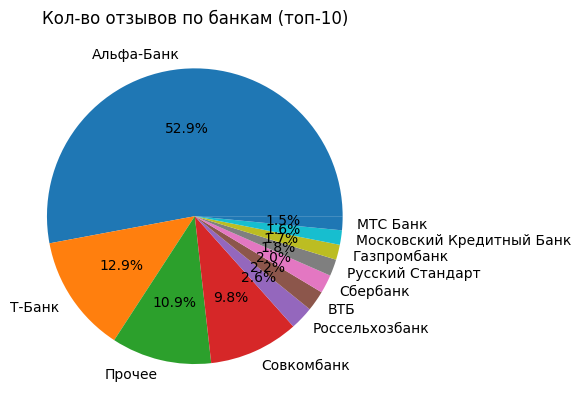

In [36]:
plt.pie(name_counts, labels=name_counts.index, autopct='%1.1f%%')
plt.title("Кол-во отзывов по банкам (топ-10)");

Газпромбанк в списке на 8 месте с количеством отзывов 8954 (всего отзывов, включая непроверенные 10067).